In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import boxcox

In [2]:
customer_df = pd.read_csv("Data/Cleaned_Data_Marketing_Customer_Analysis_Round2.csv")

# Final Cleaning 

The dataset was cleaned before, now I only do some final changes before the linear regression. 
<br><br>
After cleaning the dataset I decided to drop all rows that contained NaNs instead of filling them. I replaced all zeros in the income column with NaNs before dropping rows with NaNs.

In [3]:
customer_df.dropna(inplace=True)

# Removing outliers

To detect outliers I plotted boxplots of all numerical columns.

Text(0.5, 1.0, 'Months Since Policy Inception')

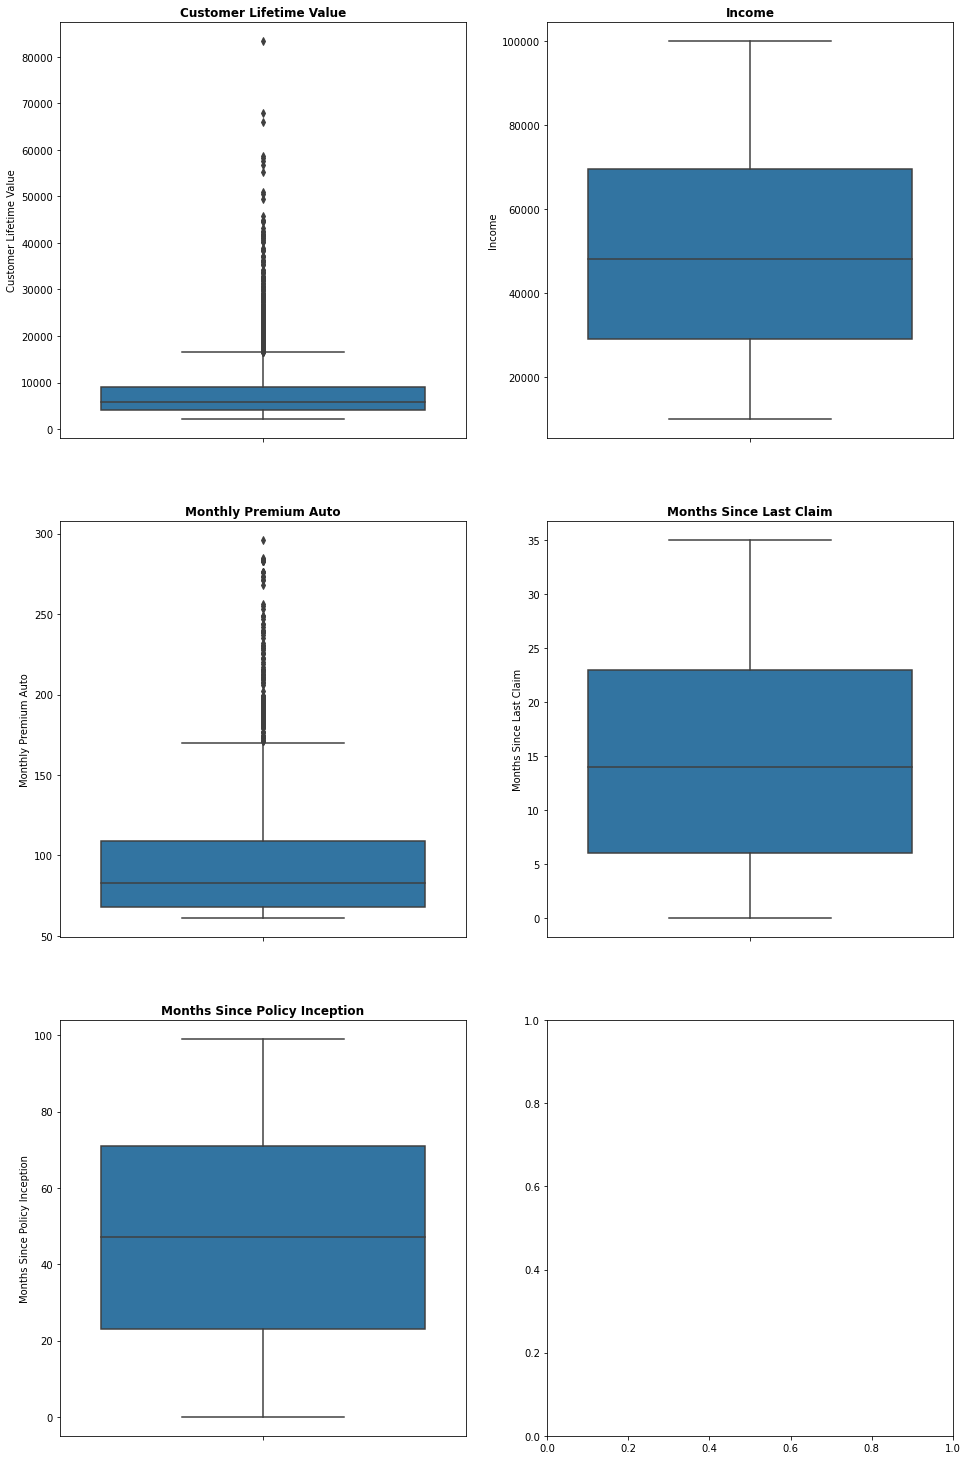

In [4]:
fig2, ax2 = plt.subplots(3,2, figsize=(16,26))

sns.boxplot(y=customer_df['Customer Lifetime Value'], ax = ax2[0,0])
ax2[0,0].set_title('Customer Lifetime Value', fontweight='bold')

sns.boxplot(y=customer_df['Income'], ax = ax2[0,1])
ax2[0,1].set_title('Income', fontweight='bold')

sns.boxplot(y=customer_df['Monthly Premium Auto'], ax = ax2[1,0])
ax2[1,0].set_title('Monthly Premium Auto', fontweight='bold')

sns.boxplot(y=customer_df['Months Since Last Claim'], ax = ax2[1,1])
ax2[1,1].set_title('Months Since Last Claim', fontweight='bold')

sns.boxplot(y=customer_df['Months Since Policy Inception'], ax = ax2[2,0])
ax2[2,0].set_title('Months Since Policy Inception', fontweight='bold')

I decided to remove outliers from the column Customer Lifetime Value, I removed all data that lied outside od three st.dev from the mean.

Originally I also removed outliers from Monthly Premium Auto but later decided to not do it.

In [5]:
mean_clv = np.mean(customer_df['Customer Lifetime Value'])
std_clv = np.std(customer_df['Customer Lifetime Value'])

threshold = 3
outliers_clv = []
for i in customer_df['Customer Lifetime Value']:
    z = (i-mean_clv)/std_clv
    if z > threshold:
        outliers_clv.append(i)
print(outliers_clv)

[32474.77, 42561.63, 30763.26, 32450.39, 36293.15, 57520.5, 33718.84, 30061.69, 35227.3, 37111.66, 58166.55, 36229.41, 34090.04, 41745.01, 36057.54, 45708.65, 41787.9, 41787.9, 38887.9, 41075.43, 33473.35, 44856.11, 56675.94, 38230.21, 38496.95, 35440.14, 44468.02, 32725.3, 32069.88, 44795.47, 29973.42, 30442.54, 41491.74, 51016.07, 36946.06, 40688.53, 42389.01, 30718.81, 32864.4, 31316.61, 37243.63, 32098.32, 34243.51, 66025.75, 35850.6, 33473.35, 55277.45, 41855.17, 30475.78, 41787.9, 41103.24, 41787.9, 83325.38, 32317.03, 30118.66, 58753.88, 49423.8, 38410.6, 43290.5, 31221.75, 67907.27, 31920.77, 40224.01, 50568.26, 32021.4, 29676.81, 40235.97, 32677.34, 32613.69, 32306.29]


In [6]:
#Here I remove all the rows that contain outliers.

customer_df = customer_df[customer_df['Customer Lifetime Value'].isin(outliers_clv) == False]

Text(0.5, 1.0, 'Months Since Policy Inception')

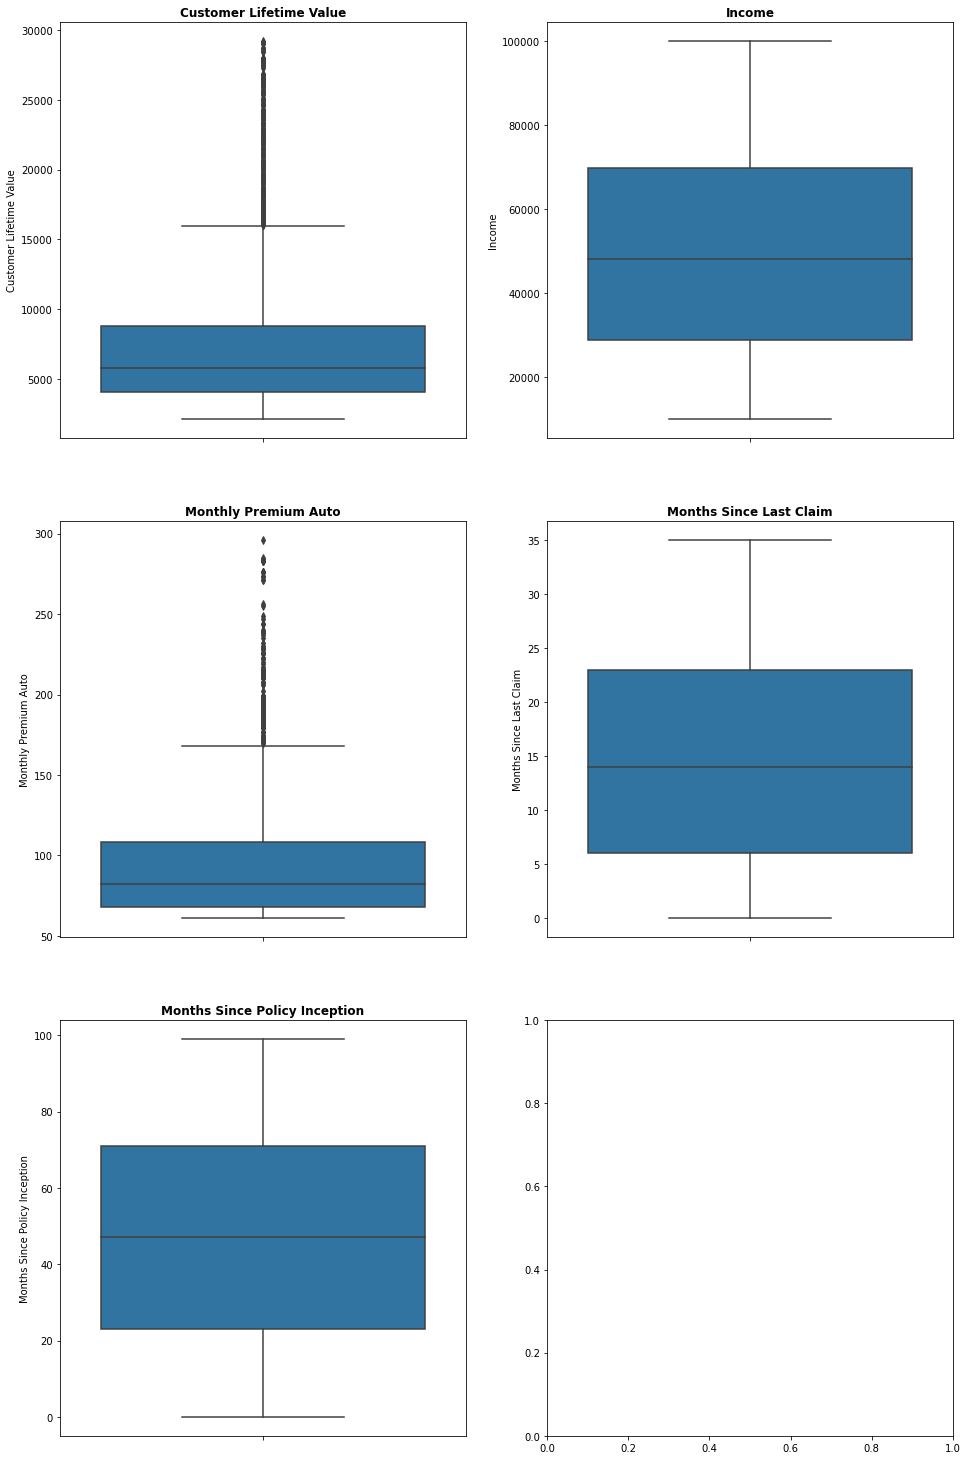

In [7]:
#Here I plot boxplots one more time to see the difference 

fig2, ax2 = plt.subplots(3,2, figsize=(16,26))

sns.boxplot(y=customer_df['Customer Lifetime Value'], ax = ax2[0,0])
ax2[0,0].set_title('Customer Lifetime Value', fontweight='bold')

sns.boxplot(y=customer_df['Income'], ax = ax2[0,1])
ax2[0,1].set_title('Income', fontweight='bold')

sns.boxplot(y=customer_df['Monthly Premium Auto'], ax = ax2[1,0])
ax2[1,0].set_title('Monthly Premium Auto', fontweight='bold')

sns.boxplot(y=customer_df['Months Since Last Claim'], ax = ax2[1,1])
ax2[1,1].set_title('Months Since Last Claim', fontweight='bold')

sns.boxplot(y=customer_df['Months Since Policy Inception'], ax = ax2[2,0])
ax2[2,0].set_title('Months Since Policy Inception', fontweight='bold')

# Linear Regression

## X / y Split

In [8]:
X = customer_df.drop('Total Claim Amount', axis=1)

y = customer_df['Total Claim Amount'] #target variable

## Data transformation

In [9]:
# split X to numerical and categorical dataframes for transformation of data

X_numeric = X._get_numeric_data()
X_numeric.drop(columns=['Number of Open Complaints','Number of Policies'], inplace=True) 

#drop these two columns because they are categorical

X_categorical = X.select_dtypes(np.object)

X_categorical['Number of Open Complaints'] = customer_df['Number of Open Complaints']
X_categorical['Number of Policies'] = customer_df['Number of Policies']
X_categorical.drop('Customer', axis=1, inplace=True) #dropping the column with the customer ID

/var/folders/qw/spw5ptl93b53bn0c_4sqb01m0000gq/T/ipykernel_34040/275863358.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_categorical['Number of Open Complaints'] = customer_df['Number of Open Complaints']
/var/folders/qw/spw5ptl93b53bn0c_4sqb01m0000gq/T/ipykernel_34040/275863358.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_categorical['Number of Policies'] = customer_df['Number of Policies']
/Users/filipmakara2/opt/anaconda3/envs/DA_Env/lib/python3.9/site-packages/pandas/core/frame.py:490

In [10]:
# Get dummies for categorical variables

X_categorical=pd.get_dummies(X_categorical, drop_first=True)

In [11]:
# Concatenate numerical and categorical dataframes 

X = pd.concat([X_numeric, X_categorical], axis=1)
X

Customer Lifetime Value   Income  Monthly Premium Auto  \
2                     14947.92  22139.0                   100   
3                     22332.44  49078.0                    97   
10                     5154.76  82730.0                   127   
13                     5454.59  66334.0                    69   
16                     5326.68  76717.0                    66   
...                        ...      ...                   ...   
10860                  9075.77  37722.0                   116   
10865                  3579.02  28304.0                    91   
10866                  2771.66  59855.0                    74   
10869                  5259.44  61146.0                    65   
10871                 11971.98  64195.0                   158   

       Months Since Last Claim  Months Since Policy Inception  \
2                         34.0                             31   
3                         10.0                              3   
10                        13.0                             31   
13                        25.0                             25   
16                        26.0                             10   
...                        ...                            ...   
10860                      8.0                             23   
10865                     10.0                             30   
10866                     30.0                             82   
10869                      7.0                             68   
10871                      0.0                             27   

       Number of Open Complaints  Number of Policies  State_California  \
2                            0.0                   2                 0   
3                            0.0                   2                 0   
10                           0.0                   1                 0   
13                           0.0                   4                 1   
16                           0.0                   6                 1   
...                          ...                 ...               ...   
10860                        0.0                   8                 0   
10865                        2.0                   1                 1   
10866                        4.0                   1                 0   
10869                        0.0                   6                 0   
10871                        4.0                   6                 1   

       State_Nevada  State_Oregon  ...  Sales Channel_Branch  \
2                 0             0  ...                     0   
3                 0             1  ...                     1   
10                0             0  ...                     1   
13                0             0  ...                     0   
16                0             0  ...                     0   
...             ...           ...  ...                   ...   
10860             0             0  ...                     0   
10865             0             0  ...                     0   
10866             0             0  ...                     1   
10869             0             1  ...                     1   
10871             0             0  ...                     1   

       Sales Channel_Call Center  Sales Channel_Web  Vehicle Class_Luxury Car  \
2                              1                  0                         0   
3                              0                  0                         0   
10                             0                  0                         0   
13                             1                  0                         0   
16                             1                  0                         0   
...                          ...                ...                       ...   
10860                          0                  0                         0   
10865                          0                  0                         0   
10866                          0                  0       

## Train / Test Split

In [12]:
# Data splitting to TRAIN / TEST sets in ratio 80/20 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.20,random_state=123)

## Standardization

In [13]:
#TRAIN

std_scaler=StandardScaler().fit(X_train)   

X_train_scaled=std_scaler.transform(X_train)

In [14]:
#TEST

X_test_scaled=std_scaler.transform(X_test)

## Model fitting

In [15]:
model=LinearRegression()    
model.fit(X_train_scaled, y_train)

LinearRegression()

In [16]:
#coefficients

model.coef_

array([ 2.29976050e+00, -1.01845251e+01,  1.68393544e+02,  5.71030038e-02,
       -2.87599775e+00, -1.53190385e+00,  2.31783019e+00, -1.93888056e+00,
       -4.17207643e+00, -5.18988822e+00, -1.29039134e+00, -6.41111340e-01,
       -6.75061277e+00, -9.76903418e+00, -2.75253556e+00, -2.30736803e+00,
        7.57361567e-01, -8.96286685e-01,  2.23172030e+00, -4.45053673e-01,
       -4.32751372e+00, -4.80542323e+00, -8.83266547e-01, -8.21185282e-01,
        2.66413968e+00,  1.66074321e+00, -6.11314168e-01, -1.29521337e+00,
       -2.34179837e+00, -8.88885184e-01,  1.48354972e+00,  4.65051588e-01,
       -5.01291706e-02,  1.29220006e+00,  3.49621254e-04, -4.04970850e+00,
        4.61356294e-01, -1.91649056e+00,  1.48457130e+00,  2.21277456e+00,
       -2.28392265e+00, -1.63413692e+00,  1.68950056e+00, -1.69938394e+00,
        2.49294928e+00, -2.55971805e+00, -2.02642928e+00, -3.41248290e+00,
       -3.36517979e-01, -7.34501935e-01, -2.92062177e+00, -4.20940437e-01,
        1.62416849e+00, -

In [17]:
#intercept

model.intercept_

375.06019899074187

## R2

In [18]:
#score of the model (R2) on the test set

R2 = model.score(X_test_scaled, y_test)

Adj_R2 = 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print(R2)
print(Adj_R2)

0.8107342757613138
0.7740468980556265


In [19]:
#score of the model (R2) on train set

R2 = model.score(X_train_scaled, y_train)

Adj_R2 = 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print(R2)
print(Adj_R2)

0.7964017907319111
0.7569361958194373


## Predicition

In [20]:
y_pred=model.predict(X_test_scaled)

In [21]:
y_pred

array([ 5.04900350e+02,  3.46436197e+02,  8.55563516e+00,  9.79881260e+02,
        5.09884344e+02,  5.74592580e+02,  2.26188370e+02,  5.73127179e+02,
        1.24855965e+02,  4.73627574e+02,  3.97345102e+02,  5.01412595e+02,
        1.42343965e+02,  4.24981877e+02,  5.82665724e+02, -7.79624891e+00,
        4.56555314e+02,  5.46250440e+02,  3.66445752e+02,  4.39441506e+02,
        6.10280733e+02,  2.59583601e+01,  5.38854744e+02,  1.71018949e+02,
        3.88258252e+02,  6.26503182e+02,  7.03554250e+02,  2.00830660e+02,
        3.65442814e+02,  9.57939772e+00,  6.08995521e+02,  5.97339271e+02,
        5.01279387e+02,  6.00162511e+01, -1.57417476e+01,  2.12963840e+01,
       -1.59636273e+01,  3.89434804e+02,  3.69126352e+02,  4.35479907e+02,
        5.61961327e+02,  5.50435562e+02,  4.06997304e+02,  1.08605568e+02,
        7.26412125e+02,  1.89277193e+02,  6.00137784e+02, -4.17599153e+01,
        2.91305557e+02,  4.10065120e+02, -1.14868730e+01,  5.06692463e+02,
        4.80938645e+02,  

In [22]:
y_test

4924     701.71
9095     296.21
9106      56.37
8118    1961.16
2718     633.60
         ...   
6309     621.46
913      403.20
8136     331.20
4366       8.32
3076     181.69
Name: Total Claim Amount, Length: 660, dtype: float64

In [23]:
result = pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
result

y_test      y_pred
4924   701.71  504.900350
9095   296.21  346.436197
9106    56.37    8.555635
8118  1961.16  979.881260
2718   633.60  509.884344
...       ...         ...
6309   621.46  549.663546
913    403.20  474.168730
8136   331.20  420.724064
4366     8.32   32.022836
3076   181.69  255.563645

[660 rows x 2 columns]

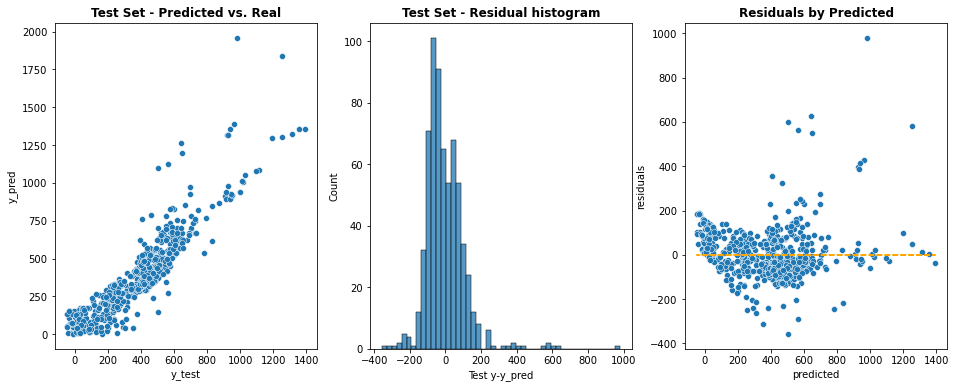

In [24]:
fig1, ax1 = plt.subplots(1,3, figsize=(16,6))

sns.scatterplot(x=y_pred, y=y_test, ax=ax1[0])
ax1[0].set_xlabel("y_test")
ax1[0].set_ylabel("y_pred")
ax1[0].set_title('Test Set - Predicted vs. Real', fontweight='bold')

sns.histplot(y_test-y_pred, ax = ax1[1])
ax1[1].set_xlabel("Test y-y_pred")
ax1[1].set_title('Test Set - Residual histogram', fontweight='bold')

sns.scatterplot(x = y_pred,y = y_test - y_pred, ax=ax1[2])
ax1[2].set_xlabel("predicted")
ax1[2].set_ylabel("residuals")
ax1[2].set_title('Residuals by Predicted', fontweight='bold')
ax1[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed', color='orange')

# Model validation

## MSE, MAE, RMSE

In [25]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

MSE = mse(y_test,y_pred)
MAE = mae(y_test,y_pred)
RMSE = np.sqrt(MSE)

print(MSE)
print(MAE)
print(RMSE)

12993.058228717016
79.5015214781057
113.98709676413824


## Feature Importance

In [26]:
#least important features on top because I wanted to decide if I should delete some columns

features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=True)

In [27]:
features_importances

Attribute    Importance
34   Effective To Date_1/25/11  3.496213e-04
61   Effective To Date_2/21/11  2.714595e-02
106         Vehicle Size_Small  4.163269e-02
32   Effective To Date_1/23/11  5.012917e-02
3      Months Since Last Claim  5.710300e-02
..                         ...           ...
84   Policy Type_Personal Auto  1.241387e+14
93           Policy_Special L3  1.278035e+14
92           Policy_Special L2  1.329194e+14
90          Policy_Personal L3  1.390718e+14
85    Policy Type_Special Auto  2.016038e+14

[107 rows x 2 columns]

# Comparing Linear Models

## Lasso, Ridge, ElasticNet

In [28]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet, LinearRegression

def linear_function (X_train_scaled, X_test_scaled, y_train, y_test, lin_model=LinearRegression()):
    
    model=lin_model 
    model.fit(X_train_scaled, y_train)
    
    R2_test = model.score(X_test_scaled, y_test)
    Adj_R2_test = 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    
    R2_train = model.score(X_train_scaled, y_train)
    Adj_R2_train = 1 - (1-R2)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
    
    return print(f"{model.__class__.__name__}: Train -> {model.score(X_train_scaled, y_train)}, Test -> {model.score(X_test_scaled, y_test)}")

In [29]:
linear_function(X_train_scaled, X_test_scaled, y_train, y_test, lin_model=Ridge(alpha=1000))

Ridge: Train -> 0.7197721930466927, Test -> 0.7390143146095036


In [30]:
linear_function(X_train_scaled, X_test_scaled, y_train, y_test, lin_model=Lasso(alpha=0.01))

Lasso: Train -> 0.7964022741668264, Test -> 0.8107917542957954


In [31]:
linear_function(X_train_scaled, X_test_scaled, y_train, y_test)

LinearRegression: Train -> 0.7964017907319111, Test -> 0.8107342757613138


In [32]:
linear_function(X_train_scaled, X_test_scaled, y_train, y_test, lin_model=ElasticNet(alpha=1))

ElasticNet: Train -> 0.6926493969360699, Test -> 0.7131781143827423


## Recursive feature elimination

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [34]:
lm = LinearRegression()

selector = RFE(lm, step = 1, verbose = 1) # Step is how many features to add or drop everytime
selector.fit(X_train, y_train)

kept_features = selector.get_support(indices = True) #returns an array of integers corresponding to nonremoved features
kept_features = list(X_train.iloc[:,kept_features].columns)

X_train = selector.transform(X_train)
X_test  = selector.transform(X_test)

X_train = pd.DataFrame(X_train, columns=kept_features)
X_test  = pd.DataFrame(X_test, columns=kept_features)

print("Final selected features: ")
display(X_train)

Fitting estimator with 107 features.
Fitting estimator with 106 features.
Fitting estimator with 105 features.
Fitting estimator with 104 features.
Fitting estimator with 103 features.
Fitting estimator with 102 features.
Fitting estimator with 101 features.
Fitting estimator with 100 features.
Fitting estimator with 99 features.
Fitting estimator with 98 features.
Fitting estimator with 97 features.
Fitting estimator with 96 features.
Fitting estimator with 95 features.
Fitting estimator with 94 features.
Fitting estimator with 93 features.
Fitting estimator with 92 features.
Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estimator with 87 features.
Fitting estimator with 86 features.
Fitting estimator with 85 features.
Fitting estimator with 84 features.
Fitting estimator with 83 features.
Fitting estimator with 82 features.
Fitting estimator with 81 features.
Fitting estimator wi

Coverage_Extended  Coverage_Premium  Effective To Date_1/10/11  \
0                   0.0               0.0                        0.0   
1                   0.0               0.0                        0.0   
2                   1.0               0.0                        0.0   
3                   0.0               0.0                        0.0   
4                   0.0               1.0                        0.0   
...                 ...               ...                        ...   
2635                0.0               0.0                        0.0   
2636                1.0               0.0                        0.0   
2637                0.0               0.0                        0.0   
2638                0.0               0.0                        0.0   
2639                0.0               0.0                        0.0   

      Effective To Date_1/12/11  Effective To Date_1/13/11  \
0                           0.0                        0.0   
1                           0.0                        0.0   
2                           0.0                        0.0   
3                           0.0                        0.0   
4                           0.0                        0.0   
...                         ...                        ...   
2635                        0.0                        0.0   
2636                        0.0                        0.0   
2637                        0.0                        0.0   
2638                        0.0                        0.0   
2639                        0.0                        0.0   

      Effective To Date_1/14/11  Effective To Date_1/16/11  \
0                           0.0                        0.0   
1                           0.0                        0.0   
2                           0.0                        0.0   
3                           0.0                        0.0   
4                           0.0                        0.0   
...                         ...                        ...   
2635                        0.0                        0.0   
2636                        0.0                        0.0   
2637                        0.0                        0.0   
2638                        1.0                        0.0   
2639                        0.0                        0.0   

      Effective To Date_1/17/11  Effective To Date_1/2/11  \
0                           0.0                       0.0   
1                           0.0                       0.0   
2                           0.0                       0.0   
3                           0.0                       0.0   
4                           0.0                       0.0   
...                         ...                       ...   
2635                        0.0                       1.0   
2636                        0.0                       0.0   
2637                        0.0                       0.0   
2638                        0.0                       0.0   
2639                        0.0                       0.0   

      Effective To Date_1/24/11  ...  Policy_Personal L1  Policy_Personal L2  \
0                           0.0  ...                 0.0                 0.0   
1                           0.0  ...                 0.0                 0.0   
2                           0.0  ...                 0.0                 0.0   
3                           0.0  ...                 0.0                 0.0   
4                           0.0  ...                 1.0                 0.0   
...                         ...  ...                 ...                 ...   
2635                        0.0  ...                 0.0                 0.0   
2636                        0.0  ...                 0.0                 1.0   
2637                        0.0  ...                 0.0                 0.0   
2638                        0.0  ...                 0.0                 0.0   
2639                        0.0  ...  

In [35]:
linear_function(X_train_scaled, X_test_scaled, y_train, y_test)

LinearRegression: Train -> 0.7964017907319111, Test -> 0.8107342757613138


## Fitting the OLS Model

In [36]:
import statsmodels.api as sm

In [37]:
X_added_constant = sm.add_constant(X_train)

/Users/filipmakara2/opt/anaconda3/envs/DA_Env/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [38]:
X_added_constant

const  Coverage_Extended  Coverage_Premium  Effective To Date_1/10/11  \
0       1.0                0.0               0.0                        0.0   
1       1.0                0.0               0.0                        0.0   
2       1.0                1.0               0.0                        0.0   
3       1.0                0.0               0.0                        0.0   
4       1.0                0.0               1.0                        0.0   
...     ...                ...               ...                        ...   
2635    1.0                0.0               0.0                        0.0   
2636    1.0                1.0               0.0                        0.0   
2637    1.0                0.0               0.0                        0.0   
2638    1.0                0.0               0.0                        0.0   
2639    1.0                0.0               0.0                        0.0   

      Effective To Date_1/12/11  Effective To Date_1/13/11  \
0                           0.0                        0.0   
1                           0.0                        0.0   
2                           0.0                        0.0   
3                           0.0                        0.0   
4                           0.0                        0.0   
...                         ...                        ...   
2635                        0.0                        0.0   
2636                        0.0                        0.0   
2637                        0.0                        0.0   
2638                        0.0                        0.0   
2639                        0.0                        0.0   

      Effective To Date_1/14/11  Effective To Date_1/16/11  \
0                           0.0                        0.0   
1                           0.0                        0.0   
2                           0.0                        0.0   
3                           0.0                        0.0   
4                           0.0                        0.0   
...                         ...                        ...   
2635                        0.0                        0.0   
2636                        0.0                        0.0   
2637                        0.0                        0.0   
2638                        1.0                        0.0   
2639                        0.0                        0.0   

      Effective To Date_1/17/11  Effective To Date_1/2/11  ...  \
0                           0.0                       0.0  ...   
1                           0.0                       0.0  ...   
2                           0.0                       0.0  ...   
3                           0.0                       0.0  ...   
4                           0.0                       0.0  ...   
...                         ...                       ...  ...   
2635                        0.0                       1.0  ...   
2636                        0.0                       0.0  ...   
2637                        0.0                       0.0  ...   
2638                        0.0                       0.0  ...   
2639                        0.0                       0.0  ...   

      Policy_Personal L1  Policy_Personal L2  Policy_Personal L3  \
0                    0.0                 0.0                 1.0   
1                    0.0                 0.0                 1.0   
2                    0.0                 0.0                 1.0   
3                    0.0                 0.0                 0.0   
4                    1.0                 0.0                 0.0   
...                  ...                 ...                 ...   
2635                 0.0                 0.0                 0.0   
2636                 0.0                 1.0                 0.0   
2637                 0.0                 0.0                 0.0   
2638                 0.0                 0.0                 1.0   
2639                 0.0  

In [39]:
y_train = np.array(y_train)

In [40]:
model = sm.OLS(y_train,X_added_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     176.1
Date:                Mon, 02 May 2022   Prob (F-statistic):               0.00
Time:                        17:57:08   Log-Likelihood:                -16363.
No. Observations:                2640   AIC:                         3.283e+04
Df Residuals:                    2588   BIC:                         3.314e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        49.3275     10.938      4.510      0.000      27.880      70.775
Coverage_Extended            88.9217      5.312     16.741      0.000      78.506      99.337
Coverage_Premium            209.2183      8.516     24.567      0.000     192.519     225.918
Effective To Date_1/10/11    12.1768     16.815      0.724      0.469     -20.795      45.148
Effective To Date_1/12/11   -33.4121     19.889     -1.680      0.093     -72.412       5.588
Effective To Date_1/13/11   -47.4495     17.409     -2.726      0.006     -81.587     -13.312
Effective To Date_1/14/11   -19.3818     19.413     -0.998      0.318     -57.448      18.684
Effective To Date_1/16/11    21.8988     18.157      1.206      0.228     -13.705      57.503
Effective To Date_1/17/11    15.8735     18.569      0.855      0.393     -20.538      52.285
Effective To Date_1/2/11    -23.0785     18.753     -1.231      0.219     -59.851      13.694
Effective To Date_1/24/11    22.6858     19.252      1.178      0.239     -15.066      60.438
Effective To Date_1/26/11   -33.1034     18.565     -1.783      0.075     -69.507       3.300
Effective To Date_1/28/11   -16.6985     16.831     -0.992      0.321     -49.703      16.306
Effective To Date_1/3/11     16.3351     16.660      0.981      0.327     -16.332      49.003
Effective To Date_1/30/11   -26.9980     21.274     -1.269      0.205     -68.714      14.718
Effective To Date_1/31/11   -15.8306     17.100     -0.926      0.355     -49.363      17.701
Effective To Date_1/4/11     12.6883     22.682      0.559      0.576     -31.788      57.165
Effective To Date_1/5/11    -13.3576     18.178     -0.735      0.463     -49.002      22.286
Effective To Date_1/6/11     13.0453     19.218      0.679      0.497     -24.639      50.730
Effective To Date_1/7/11    -20.8333     19.169     -1.087      0.277     -58.421      16.754
Effective To Date_1/8/11    -22.9190     20.407     -1.123      0.262     -62.935      17.097
Effective To Date_1/9/11    -25.5146     17.602     -1.450      0.147     -60.030       9.001
Effective To Date_2/10/11   -13.8843     15.417     -0.901      0.368     -44.115      16.346
Effective To Date_2/11/11   -21.8196     18.521     -1.178      0.239     -58.137      14.498
Effective To Date_2/12/11   -12.0093     18.964     -0.633      0.527     -49.195      25.176
Effective To Date_2/13/11    16.3335     20.378      0.802      0.423     -23.625      56.292
Effective To Date_2/14/11   -27.3462     15.826     -1.728      0.084     -58.379       3.686
Effective To Date_2/16/11   -34.6546     18.420     -1.881      0.060     -70.774       1.465
Effective To Date_2/17/11    15.5781     17.646      0.883      0.377     -19.024      50.180
Effective To Date_2/18/11   -19.4573     20.305     -0.958      0.338     -

In [41]:
X_added_constant.drop(['Effective To Date_1/10/11','Effective To Date_1/12/11','Effective To Date_1/14/11','Effective To Date_1/16/11','Effective To Date_1/17/11','Effective To Date_1/2/11','Effective To Date_1/2/11',
                      'Effective To Date_1/24/11','Effective To Date_1/26/11','Effective To Date_1/28/11','Effective To Date_1/3/11','Effective To Date_1/30/11',
                      'Effective To Date_1/31/11','Effective To Date_1/4/11','Effective To Date_1/5/11','Effective To Date_1/6/11','Effective To Date_1/7/11',
                      'Effective To Date_1/8/11','Effective To Date_1/9/11','Effective To Date_2/10/11'], axis=1, inplace=True)
model = sm.OLS(y_train,X_added_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     279.4
Date:                Mon, 02 May 2022   Prob (F-statistic):               0.00
Time:                        17:57:08   Log-Likelihood:                -16375.
No. Observations:                2640   AIC:                         3.282e+04
Df Residuals:                    2607   BIC:                         3.301e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        44.4042     10.697      4.151      0.000      23.429      65.380
Coverage_Extended            89.8875      5.282     17.017      0.000      79.530     100.245
Coverage_Premium            210.5913      8.481     24.831      0.000     193.961     227.222
Effective To Date_1/13/11   -44.0936     17.265     -2.554      0.011     -77.948     -10.239
Effective To Date_2/11/11   -18.4395     18.391     -1.003      0.316     -54.502      17.623
Effective To Date_2/12/11    -8.6379     18.832     -0.459      0.647     -45.566      28.290
Effective To Date_2/13/11    19.7235     20.255      0.974      0.330     -19.994      59.441
Effective To Date_2/14/11   -24.0846     15.660     -1.538      0.124     -54.792       6.623
Effective To Date_2/16/11   -31.2088     18.280     -1.707      0.088     -67.055       4.637
Effective To Date_2/17/11    18.6638     17.506      1.066      0.286     -15.663      52.990
Effective To Date_2/18/11   -16.4011     20.176     -0.813      0.416     -55.963      23.161
Effective To Date_2/19/11   -38.6387     17.825     -2.168      0.030     -73.591      -3.686
Effective To Date_2/23/11   -17.0282     20.032     -0.850      0.395     -56.309      22.252
Effective To Date_2/24/11   -17.5953     21.568     -0.816      0.415     -59.888      24.698
Effective To Date_2/25/11    -8.2862     19.824     -0.418      0.676     -47.159      30.586
Effective To Date_2/28/11   -19.1737     19.008     -1.009      0.313     -56.446      18.098
Effective To Date_2/3/11    -16.0201     15.943     -1.005      0.315     -47.283      15.243
Effective To Date_2/9/11    -29.6477     18.595     -1.594      0.111     -66.110       6.814
EmploymentStatus_Employed   -27.0695      7.499     -3.610      0.000     -41.774     -12.365
EmploymentStatus_Retired    -47.1827     13.654     -3.456      0.001     -73.956     -20.409
Location Code_Suburban      382.9923      5.950     64.373      0.000     371.326     394.659
Location Code_Urban         218.3444      6.826     31.987      0.000     204.959     231.729
Marital Status_Married      -13.4938      5.045     -2.674      0.008     -23.387      -3.600
Policy Type_Personal Auto    10.7833      4.480      2.407      0.016       1.999      19.567
Policy Type_Special Auto     16.3333      9.549      1.710      0.087      -2.391      35.058
Policy_Personal L1            8.1993      5.292      1.549      0.121      -2.178      18.576
Policy_Personal L2            3.6706      4.350      0.844      0.399      -4.859      12.200
Policy_Personal L3           -1.0865      3.724     -0.292      0.770      -8.388       6.215
Policy_Special L1             2.3130     19.877      0.116      0.907     -36.662      41.288
Policy_Special L2            -1.2540     14.801     -0.085      0.932     -